In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D


data_train_path="Downloads/Fruits_Vegetables/Fruits_Vegetables/test"
#Fruits_Vegetables/train"
data_test_path="Downloads/Fruits_Vegetables/Fruits_Vegetables/train"
#"fruits_Vegetables/"Downloads/Fruits_Vegetables/Fruits_Vegetables/train
data_val_path="Downloads/Fruits_Vegetables/Fruits_Vegetables/validation"
#Downloads/Fruits_Vegetables"

img_width=100
img_height=100

data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)
data_cat = data_train.class_names
data_val=tf.keras.utils.image_dataset_from_directory(data_val_path,image_size=(img_height,img_width),
                                                     batch_size=32,
                                                     shuffle=False,
                                                     validation_split=False)

Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [6]:
data_test=tf.keras.utils.image_dataset_from_directory(data_test_path,image_size=(img_height,img_width),
                                                      shuffle=False,
                                                      batch_size=32,
                                                     validation_split=False)

Found 3115 files belonging to 36 classes.


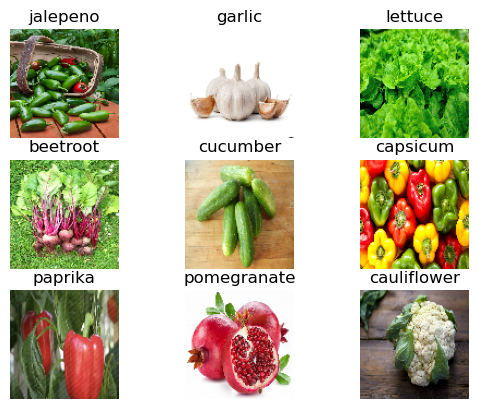

In [12]:
plt.figure(figure=(10,10))
for image, label in data_train.take(1):
    for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[label[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import MaxPooling2D
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
from tensorflow.keras import layers, Sequential


model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))])

In [15]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)


Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 625ms/step - accuracy: 0.0426 - loss: 3.6775 - val_accuracy: 0.0969 - val_loss: 3.4191
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step - accuracy: 0.1052 - loss: 3.3683 - val_accuracy: 0.2308 - val_loss: 2.8978
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step - accuracy: 0.2268 - loss: 2.8357 - val_accuracy: 0.3846 - val_loss: 2.1290
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 569ms/step - accuracy: 0.3273 - loss: 2.3451 - val_accuracy: 0.6097 - val_loss: 1.6905
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 570ms/step - accuracy: 0.5589 - loss: 1.6730 - val_accuracy: 0.6809 - val_loss: 1.1150
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 576ms/step - accuracy: 0.6044 - loss: 1.2678 - val_accuracy: 0.7066 - val_loss: 1.0195
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 535ms/step - accuracy: 0.7266 - loss: 0.9828 - val_accuracy: 0.8462 - val_loss: 0.5812
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 594ms/step - accuracy: 0.8478 - loss: 0.5784 - val_accuracy: 0

In [16]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
data_val


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

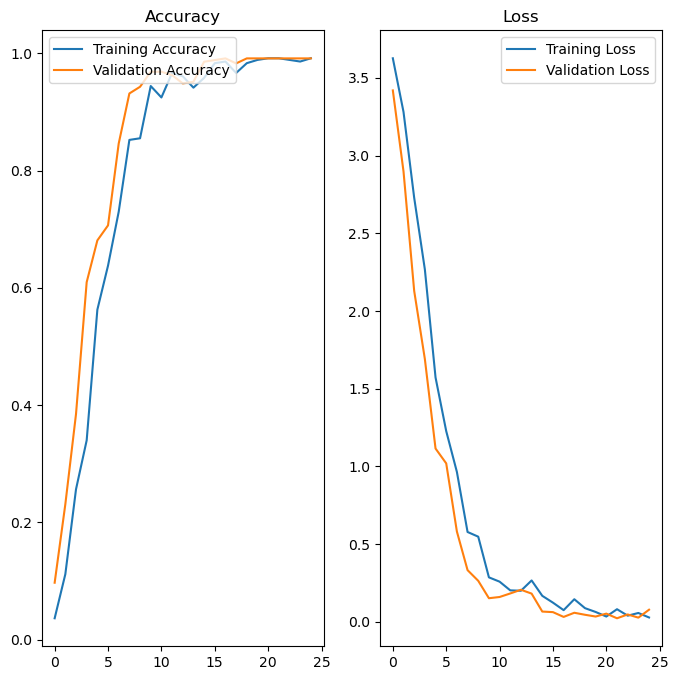

In [19]:
import matplotlib.pyplot as plt

epochs_size = 25
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()


In [23]:
image="Banana.jpeg"
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


In [24]:
predict=model.predict(img_bat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


In [25]:
score=tf.nn.softmax(predict)

In [31]:
#print("Veg/Fruit in image is {} with accuracy of {0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))
print("Veg/Fruit in image is {} with accuracy of {:.2f}".format(data_cat[np.argmax(score)], np.max(score) * 100))


Veg/Fruit in image is banana with accuracy of 59.47


In [33]:
image="Apple.jpeg"
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)


In [34]:
predict=model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [35]:
score=tf.nn.softmax(predict)

In [36]:
#print("Veg/Fruit in image is {} with accuracy of {0.2f}".format(data_cat[np.argmax(score)],np.max(score)*100))
print("Veg/Fruit in image is {} with accuracy of {:.2f}".format(data_cat[np.argmax(score)], np.max(score) * 100))

Veg/Fruit in image is tomato with accuracy of 40.64


In [37]:
model.save("Image_classify.keras")